In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd

In [3]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

In [4]:
session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [5]:
type(data)

dict

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10861,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.964728e+07,1.964728e+07,False,NaN,1,NaN,NaN,None,2024-03-07T12:23:00.000Z,67011.423883,5.503181e+10,-46.5798,0.425421,0.170461,6.923358,56.865549,52.034853,53.331129,1.316592e+12,52.1820,1.407240e+12,None,2024-03-07T12:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-07 09:23:56.964537
1,1027,Ethereum,ETH,ethereum,8507,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201140e+08,1.201140e+08,True,NaN,2,NaN,NaN,None,2024-03-07T12:23:00.000Z,3794.086010,2.605462e+10,-48.9671,0.226977,-1.689323,9.076983,63.327348,69.574771,60.215606,4.557229e+11,18.0681,4.557229e+11,None,2024-03-07T12:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-07 09:23:56.964537
2,825,Tether USDt,USDT,tether,77186,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.007291e+11,1.037971e+11,True,NaN,3,NaN,NaN,None,2024-03-07T12:22:00.000Z,1.000499,1.066067e+11,-43.7195,-0.009156,0.022078,0.033049,0.158072,-0.001745,0.041425,1.007793e+11,3.9956,1.038489e+11,None,2024-03-07T12:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-07 09:23:56.964537
3,1839,BNB,BNB,bnb,2084,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495409e+08,1.495409e+08,False,NaN,4,NaN,NaN,None,2024-03-07T12:22:00.000Z,439.666816,2.684352e+09,-30.6428,0.879723,3.459387,7.431902,45.522417,43.541934,87.360992,6.574816e+10,2.6059,6.574816e+10,None,2024-03-07T12:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-07 09:23:56.964537
4,5426,Solana,SOL,solana,635,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.430136e+08,5.712054e+08,True,NaN,5,NaN,NaN,None,2024-03-07T12:23:00.000Z,141.247936,6.148602e+09,-35.5993,0.081911,8.407208,10.014506,50.241418,49.617594,92.483799,6.257476e+10,2.4801,8.068159e+10,None,2024-03-07T12:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-07 09:23:56.964537
5,52,XRP,XRP,xrp,1242,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.466403e+10,9.998785e+10,False,NaN,6,NaN,NaN,None,2024-03-07T12:23:00.000Z,0.624639,2.691726e+09,-38.3760,0.654398,2.493065,4.494591,24.909901,10.292079,-4.312455,3.414529e+10,1.3538,6.246390e+10,None,2024-03-07T12:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-07 09:23:56.964537
6,3408,USDC,USDC,usd-coin,17072,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.913680e+10,2.913680e+10,False,NaN,7,NaN,NaN,None,2024-03-07T12:23:00.000Z,1.000005,1.084654e+10,-41.5061,0.004132,-0.001742,0.010805,0.002598,0.003385,-0.005034,2.913695e+10,1.1548,2.913695e+10,None,2024-03-07T12:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-07 09:23:56.964537
7,2010,Cardano,ADA,cardano,1089,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.548924e+10,3.668585e+10,False,NaN,8,NaN,NaN,None,2024-03-07T12:22:00.000Z,0.738654,1.013327e+09,-52.4099,0.746931,1.638892,6.902837,50.272684,41.893888,43.525678,2.621428e+10,1.0393,3.323944e+10,None,2024-03-07T12:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-07 09:23:56.964537
8,74,Dogecoin,DOGE,dogecoin,913,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.433

In [8]:
def api_runner():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }
    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\pedro\Documents\Data_Science\Web Scraping\CryptoWeb.csv'):
        df.to_csv(r'C:\Users\pedro\Documents\Data_Science\Web Scraping\CryptoWeb.csv', header='column_names', index=False)
    else:
        df.to_csv(r'C:\Users\pedro\Documents\Data_Science\Web Scraping\CryptoWeb.csv', mode='a', header=False, index=False)


In [30]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60)

API Runner completed
API Runner completed


In [31]:
df2 = pd.read_csv(r'C:\Users\pedro\Documents\Data_Science\Web Scraping\CryptoWeb.csv')
df2

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10861,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19647281.00000,19647281.00000,False,NaN,1,NaN,NaN,NaN,2024-03-07T12:23:00.000Z,67011.42388,55031809444.21013,-46.57980,0.42542,0.17046,6.92336,56.86555,52.03485,53.33113,1316592275244.62891,52.18200,1407239901548.58008,NaN,2024-03-07T12:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-07 09:24:48.256996
1,1027,Ethereum,ETH,ethereum,8507,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120114025.48535,120114025.48535,True,NaN,2,NaN,NaN,NaN,2024-03-07T12:23:00.000Z,3794.08601,26054619028.13634,-48.96710,0.22698,-1.68932,9.07698,63.32735,69.57477,60.21561,455722943753.52930,18.06810,455722943753.53003,NaN,2024-03-07T12:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-07 09:24:48.256996
2,825,Tether USDt,USDT,tether,77186,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,100729057191.32368,103797122782.55450,True,NaN,3,NaN,NaN,NaN,2024-03-07T12:22:00.000Z,1.00050,106606659895.00282,-43.71950,-0.00916,0.02208,0.03305,0.15807,-0.00175,0.04143,100779272552.12636,3.99560,103848867632.71001,NaN,2024-03-07T12:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-07 09:24:48.256996
3,1839,BNB,BNB,bnb,2084,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,149540879.14992,149540879.14992,False,NaN,4,NaN,NaN,NaN,2024-03-07T12:22:00.000Z,439.66682,2684351522.24266,-30.64280,0.87972,3.45939,7.43190,45.52242,43.54193,87.36099,65748162193.49937,2.60590,65748162193.50000,NaN,2024-03-07T12:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-07 09:24:48.256996
4,5426,Solana,SOL,solana,635,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,443013622.20515,571205417.19396,True,NaN,5,NaN,NaN,NaN,2024-03-07T12:23:00.000Z,141.24794,6148601711.34490,-35.59930,0.08191,8.40721,10.01451,50.24142,49.61759,92.48380,62574759558.99422,2.48010,80681585956.19000,NaN,2024-03-07T12:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-07 09:24:48.256996
5,52,XRP,XRP,xrp,1242,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,54664031281.00000,99987852435.00000,False,NaN,6,NaN,NaN,NaN,2024-03-07T12:23:00.000Z,0.62464,2691726303.80316,-38.37600,0.65440,2.49307,4.49459,24.90990,10.29208,-4.31246,34145285404.14624,1.35380,62463899211.21000,NaN,2024-03-07T12:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-07 09:24:48.256996
6,3408,USDC,USDC,usd-coin,17072,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,29136804958.57750,29136804958.57750,False,NaN,7,NaN,NaN,NaN,2024-03-07T12:23:00.000Z,1.00001,10846544470.28831,-41.50610,0.00413,-0.00174,0.01080,0.00260,0.00338,-0.00503,29136954864.26511,1.15480,29136954864.27000,NaN,2024-03-07T12:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-07 09:24:48.256996
7,2010,Cardano,ADA,cardano,1089,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35489235521.94300,36685854736.85100,False,NaN,8,NaN,NaN,NaN,2024-03-07T12:22:00.000Z,0.73865,1013326578.85910,-52.40990,0.74693,1.63889,6.90284,50.27268,41.89389,43.52568,26214276788.06563,1.03930,33239443964.17000,NaN,2024-03-07T12:22:00.000Z,NaN,NaN,NaN

In [11]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [42]:
df2

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10861,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19647281.00000,19647281.00000,False,NaN,1,NaN,NaN,NaN,2024-03-07T12:23:00.000Z,67011.42388,55031809444.21013,-46.57980,0.42542,0.17046,6.92336,56.86555,52.03485,53.33113,1316592275244.62891,52.18200,1407239901548.58008,NaN,2024-03-07T12:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-07 09:24:48.256996
1,1027,Ethereum,ETH,ethereum,8507,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120114025.48535,120114025.48535,True,NaN,2,NaN,NaN,NaN,2024-03-07T12:23:00.000Z,3794.08601,26054619028.13634,-48.96710,0.22698,-1.68932,9.07698,63.32735,69.57477,60.21561,455722943753.52930,18.06810,455722943753.53003,NaN,2024-03-07T12:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-07 09:24:48.256996
2,825,Tether USDt,USDT,tether,77186,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,100729057191.32368,103797122782.55450,True,NaN,3,NaN,NaN,NaN,2024-03-07T12:22:00.000Z,1.00050,106606659895.00282,-43.71950,-0.00916,0.02208,0.03305,0.15807,-0.00175,0.04143,100779272552.12636,3.99560,103848867632.71001,NaN,2024-03-07T12:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-07 09:24:48.256996
3,1839,BNB,BNB,bnb,2084,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,149540879.14992,149540879.14992,False,NaN,4,NaN,NaN,NaN,2024-03-07T12:22:00.000Z,439.66682,2684351522.24266,-30.64280,0.87972,3.45939,7.43190,45.52242,43.54193,87.36099,65748162193.49937,2.60590,65748162193.50000,NaN,2024-03-07T12:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-07 09:24:48.256996
4,5426,Solana,SOL,solana,635,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,443013622.20515,571205417.19396,True,NaN,5,NaN,NaN,NaN,2024-03-07T12:23:00.000Z,141.24794,6148601711.34490,-35.59930,0.08191,8.40721,10.01451,50.24142,49.61759,92.48380,62574759558.99422,2.48010,80681585956.19000,NaN,2024-03-07T12:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-07 09:24:48.256996
5,52,XRP,XRP,xrp,1242,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,54664031281.00000,99987852435.00000,False,NaN,6,NaN,NaN,NaN,2024-03-07T12:23:00.000Z,0.62464,2691726303.80316,-38.37600,0.65440,2.49307,4.49459,24.90990,10.29208,-4.31246,34145285404.14624,1.35380,62463899211.21000,NaN,2024-03-07T12:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-07 09:24:48.256996
6,3408,USDC,USDC,usd-coin,17072,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,29136804958.57750,29136804958.57750,False,NaN,7,NaN,NaN,NaN,2024-03-07T12:23:00.000Z,1.00001,10846544470.28831,-41.50610,0.00413,-0.00174,0.01080,0.00260,0.00338,-0.00503,29136954864.26511,1.15480,29136954864.27000,NaN,2024-03-07T12:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-07 09:24:48.256996
7,2010,Cardano,ADA,cardano,1089,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35489235521.94300,36685854736.85100,False,NaN,8,NaN,NaN,NaN,2024-03-07T12:22:00.000Z,0.73865,1013326578.85910,-52.40990,0.74693,1.63889,6.90284,50.27268,41.89389,43.52568,26214276788.06563,1.03930,33239443964.17000,NaN,2024-03-07T12:22:00.000Z,NaN,NaN,NaN

In [43]:
df3 = df2.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.11617,0.52923,6.67155,56.52090,51.58614,52.91950
Ethereum,0.08141,-1.45451,9.00978,63.12555,69.19133,60.01168
Tether USDt,-0.00360,0.02891,0.03751,0.16252,-0.00091,0.02791
BNB,0.69192,3.83890,7.65349,45.64030,43.58393,87.20973
Solana,0.99830,9.48228,10.01212,51.17026,49.90680,93.76248
XRP,0.15838,2.66028,4.24095,24.48033,9.78627,-4.76223
USDC,0.00156,-0.00842,0.00698,-0.00971,-0.00145,-0.00963
Cardano,-0.03004,1.81748,6.41822,49.76548,41.38688,42.40776
Dogecoin,-1.37285,-7.37315,17.86063,94.76386,89.25151,54.82633


In [44]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.11617
             quote.USD.percent_change_24h     0.52923
             quote.USD.percent_change_7d      6.67155
             quote.USD.percent_change_30d    56.52090
             quote.USD.percent_change_60d    51.58614
             quote.USD.percent_change_90d    52.91950
Ethereum     quote.USD.percent_change_1h      0.08141
             quote.USD.percent_change_24h    -1.45451
             quote.USD.percent_change_7d      9.00978
             quote.USD.percent_change_30d    63.12555
             quote.USD.percent_change_60d    69.19133
             quote.USD.percent_change_90d    60.01168
Tether USDt  quote.USD.percent_change_1h     -0.00360
             quote.USD.percent_change_24h     0.02891
             quote.USD.percent_change_7d      0.03751
             quote.USD.percent_change_30d     0.16252
             quote.USD.percent_change_60d    -0.00091
             quote.USD.percent_change_90

In [45]:
type(df4)

pandas.core.series.Series

In [46]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.11617
            quote.USD.percent_change_24h   0.52923
            quote.USD.percent_change_7d    6.67155
            quote.USD.percent_change_30d  56.52090
            quote.USD.percent_change_60d  51.58614
            quote.USD.percent_change_90d  52.91950
Ethereum    quote.USD.percent_change_1h    0.08141
            quote.USD.percent_change_24h  -1.45451
            quote.USD.percent_change_7d    9.00978
            quote.USD.percent_change_30d  63.12555
            quote.USD.percent_change_60d  69.19133
            quote.USD.percent_change_90d  60.01168
Tether USDt quote.USD.percent_change_1h   -0.00360
            quote.USD.percent_change_24h   0.02891
            quote.USD.percent_change_7d    0.03751
            quote.USD.percent_change_30d   0.16252
            quote.USD.percent_change_60d  -0.00091
            quote.USD.percent_change_90d   0.02791
BNB         quote.USD.percent_change_1h    0.69192
            quote.USD.percent_change_24h   3.83890
            quote.USD.percent_change_7d    7.65349
            quote.USD.percent_change_30d  45.64030
            quote.USD.percent_change_60d  43.58393
            quote.USD.percent_change_90d  87.20973
Solana      quote.USD.percent_change_1h    0.99830
            quote.USD.percent_change_24h   9.48228
            quote.USD.percent_change_7d   10.01212
            quote.USD.percent_change_30d  51.17026
            quote.USD.percent_change_60d  49.90680
            quote.USD.percent_change_90d  93.76248
XRP         quote.USD.percent_change_1h    0.15838
            quote.USD.percent_change_24h   2.66028
            quote.USD.percent_change_7d    4.24095
            quote.USD.percent_change_30d  24.48033
            quote.USD.percent_change_60d   9.78627
            quote.USD.percent_change_90d  -4.76223
USDC        quote.USD.percent_change_1h    0.00156
            quote.USD.percent_change_24h  -0.00842
            quote.USD.percent_change_7d    0.00698
            quote.USD.percent_change_30d  -0.00971
            quote.USD.percent_change_60d  -0.00145
            quote.USD.percent_change_90d  -0.00963
Cardano     quote.USD.percent_change_1h   -0.03004
            quote.USD.percent_change_24h   1.81748
            quote.USD.percent_change_7d    6.41822
            quote.USD.percent_change_30d  49.76548
            quote.USD.percent_change_60d  41.38688
            quote.USD.percent_change_90d  42.40776
Dogecoin    quote.USD.percent_change_1h   -1.37285
            quote.USD.percent_change_24h  -7.37315
            quote.USD.percent_change_7d   17.86063
            quote.USD.percent_change_30d  94.76386
            quote.USD.percent_change_60d  89.25151
            quote.USD.percent_change_90d  54.82633
Shiba Inu   quote.USD.percent_change_1h   -1.19946
            quote.USD.percent_change_24h -10.85886
            quote.USD.percent_change_7d  130.49424
            quote.USD.percent_change_30d 254.33316
            quote.USD.percent_change_60d 230.38754
            quote.USD.percent_change_90d 211.38054
Avalanche   quote.USD.percent_change_1h    0.19792
            quote.USD.percent_change_24h   5.94619
            quote.USD.percent_change_7d    0.26684
            quote.USD.percent_change_30d  26.59163
            quote.USD.percent_change_60d  22.92207
            quote.USD.percent_change_90d  56.46482
Polkadot    quote.USD.percent_change_1h    0.10842
            quote.USD.percent_change_24h   4.54070
            quote.USD.percent_change_7d   19.77049
            quote.USD.percent_change_30d  56.23646
            quote.USD.percent_change_60d  44.93214
            quote.USD.percent_change_90d  59.88586
TRON        quote.USD.percent_change_1h   -0.02881
            quote.USD.percent_change_24h  -0.50475
            quote.USD.percent_change_7d   -3.83172
            quote.USD.percent_change_30d  13.51112
            quote.USD.percent_change_60d  32.13893
            quo

In [47]:
df5 = df5.reset_index()
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.11617
1,Bitcoin,quote.USD.percent_change_24h,0.52923
2,Bitcoin,quote.USD.percent_change_7d,6.67155
3,Bitcoin,quote.USD.percent_change_30d,56.52090
4,Bitcoin,quote.USD.percent_change_60d,51.58614
5,Bitcoin,quote.USD.percent_change_90d,52.91950
6,Ethereum,quote.USD.percent_change_1h,0.08141
7,Ethereum,quote.USD.percent_change_24h,-1.45451
8,Ethereum,quote.USD.percent_change_7d,9.00978
9,Ethereum,quote.USD.percent_change_30d,63.12555


In [48]:
df6 = df5.rename(columns={'level_1': 'percent_change'})
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.11617
1,Bitcoin,quote.USD.percent_change_24h,0.52923
2,Bitcoin,quote.USD.percent_change_7d,6.67155
3,Bitcoin,quote.USD.percent_change_30d,56.52090
4,Bitcoin,quote.USD.percent_change_60d,51.58614
5,Bitcoin,quote.USD.percent_change_90d,52.91950
6,Ethereum,quote.USD.percent_change_1h,0.08141
7,Ethereum,quote.USD.percent_change_24h,-1.45451
8,Ethereum,quote.USD.percent_change_7d,9.00978
9,Ethereum,quote.USD.percent_change_30d,63.12555


In [49]:
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df6

,name,percent_change,values
0,Bitcoin,1h,0.11617
1,Bitcoin,24h,0.52923
2,Bitcoin,7d,6.67155
3,Bitcoin,30d,56.52090
4,Bitcoin,60d,51.58614
5,Bitcoin,90d,52.91950
6,Ethereum,1h,0.08141
7,Ethereum,24h,-1.45451
8,Ethereum,7d,9.00978
9,Ethereum,30d,63.12555


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\pedro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


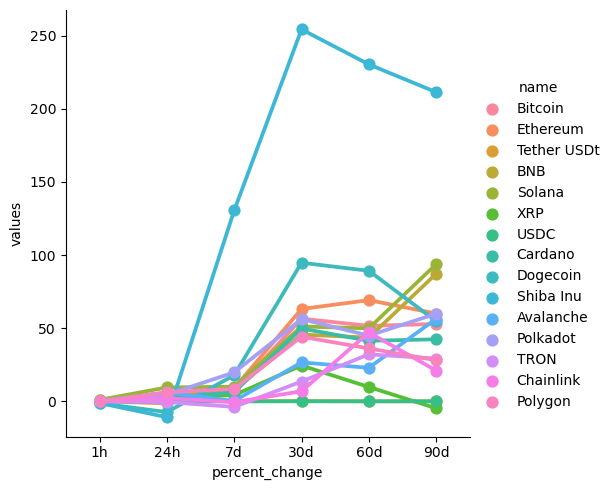

In [50]:
sns.catplot(x='percent_change', y='values', hue='name', data=df6, kind='point')

In [51]:
df_bc = df2[['name','quote.USD.price','timestamp']]
df_bc = df_bc.query("name == 'Bitcoin'")
df_bc

,name,quote.USD.price,timestamp
0,Bitcoin,67011.42388,2024-03-07 09:24:48.256996
15,Bitcoin,67011.42388,2024-03-07 09:24:52.010383
30,Bitcoin,66671.09184,2024-03-07 09:59:14.836068
45,Bitcoin,66671.09184,2024-03-07 09:59:20.621752


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

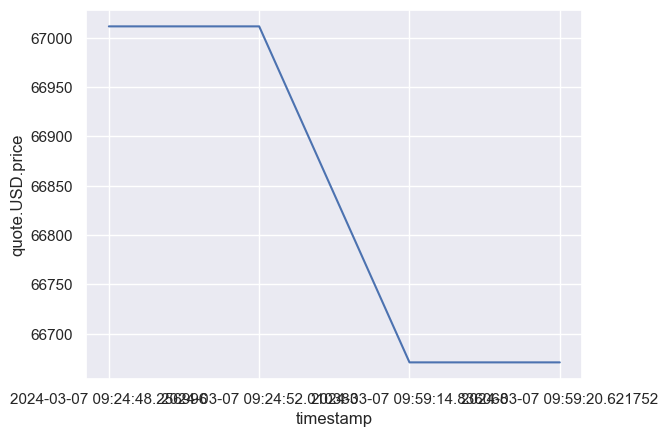

In [54]:
sns.lineplot(x='timestamp', y='quote.USD.price', data = df_bc)